In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotnine as p9

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error

In [2]:
#reading in data
train = pd.read_csv('../datasets/cleaned_train.csv', keep_default_na=False, na_values=[''])
test = pd.read_csv('../datasets/cleaned_test.csv', keep_default_na=False, na_values=[''])

In [3]:
problem_cols = ['Neighborhood', 'Condition 1', 'Condition 2', 'MS Zoning']
numeric_cols = train._get_numeric_data().columns
high_corr_cols = numeric_cols[train.corr()['SalePrice'] > .4]
num_cols = high_corr_cols.drop('SalePrice')
features = list(num_cols) + problem_cols

In [4]:
X = train[high_corr_cols.drop(['SalePrice'])].fillna(0)
y = train['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [5]:
lr = LinearRegression()

In [6]:
lr.fit(X_train, y_train)
lr.score(X_train, y_train), lr.score(X_test, y_test)

(0.8633048140784978, 0.8477957839984168)

In [7]:
mean_squared_error(y_train, lr.predict(X_train))

658254205.9851774

In [8]:
y_pred = lr.predict(X_test)

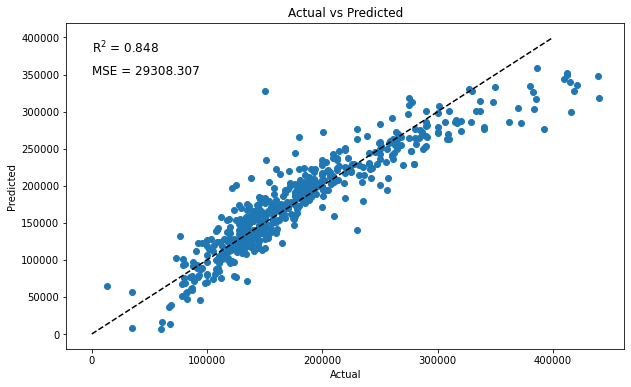

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(y_test, y_pred, 'o')
plt.plot([0, 400000], [0, 400000], 'k--')
plt.xlabel('Actual')
plt.ylabel('Predicted')

scorestr = r'R$^2$ = %.3f' % lr.score(X_test, y_test)
errstr = 'MSE = %.3f' % (mean_squared_error(y_test, y_pred) ** 0.5)
plt.text(0, 380000, scorestr, fontsize=12)
plt.text(0, 350000, errstr, fontsize=12)
plt.title('Actual vs Predicted');

In [10]:
coef_df ={train[high_corr_cols.drop('SalePrice')].columns[x] : lr.coef_[x] for x in range(len(lr.coef_))}
coef_df

{'Overall Qual': 14906.432804166798,
 'Year Built': 205.83278944543343,
 'Year Remod/Add': 404.6026917392316,
 'Mas Vnr Area': 19.737759854013323,
 'BsmtFin SF 1': 26.921315451188207,
 'Gr Liv Area': 31.33251699118182,
 'TotRms AbvGrd': -1106.5582206198726,
 'Fireplaces': 7285.227448543352,
 'Garage Cars': -913.0718688801276,
 'Garage Area': 41.378697304476944,
 'Bathrooms': -2181.3015327882968,
 'SF': 22.900850559153383}

-----------------------------

In [11]:
X = train[high_corr_cols.drop(['SalePrice'])].fillna(0)
y = train['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [12]:
lr = RidgeCV()

In [13]:
lr.fit(X_train, y_train)
lr.score(X_train, y_train), lr.score(X_test, y_test)

(0.8633008313478121, 0.847681331774293)

In [14]:
mean_squared_error(y_train, lr.predict(X_train))

658273384.782203

In [15]:
y_pred = lr.predict(X_test)

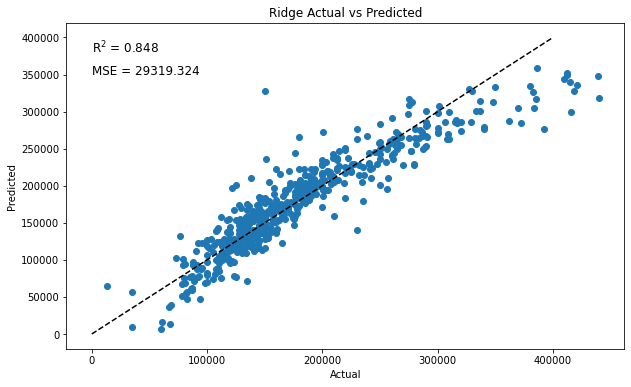

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(y_test, y_pred, 'o')
plt.plot([0, 400000], [0, 400000], 'k--')
plt.xlabel('Actual')
plt.ylabel('Predicted')

scorestr = r'R$^2$ = %.3f' % lr.score(X_test, y_test)
errstr = 'MSE = %.3f' % (mean_squared_error(y_test, y_pred) ** 0.5)
plt.text(0, 380000, scorestr, fontsize=12)
plt.text(0, 350000, errstr, fontsize=12)
plt.title('Ridge Actual vs Predicted');
plt.savefig('../images/Ridge Actual vs Predicted.jpg');

In [17]:
coef_df ={train[high_corr_cols.drop('SalePrice')].columns[x] : lr.coef_[x] for x in range(len(lr.coef_))}
coef_df

{'Overall Qual': 14782.531532586472,
 'Year Built': 206.3580188232736,
 'Year Remod/Add': 406.0537065810058,
 'Mas Vnr Area': 19.87658141180873,
 'BsmtFin SF 1': 26.91356111690402,
 'Gr Liv Area': 31.355436842888594,
 'TotRms AbvGrd': -1117.0383965158835,
 'Fireplaces': 7154.881666713247,
 'Garage Cars': -830.5455597140244,
 'Garage Area': 41.21693229302764,
 'Bathrooms': -2138.7437747575414,
 'SF': 23.02150261774659}

--------------------------------------

In [18]:
X = train[high_corr_cols.drop(['SalePrice'])].fillna(0)
y = train['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [19]:
lr = LassoCV()

In [20]:
lr.fit(X_train, y_train)
lr.score(X_train, y_train), lr.score(X_test, y_test)

(0.8212792759988781, 0.7965787767338348)

In [21]:
mean_squared_error(y_train, lr.predict(X_train))

860627735.186021

In [22]:
y_pred = lr.predict(X_test)

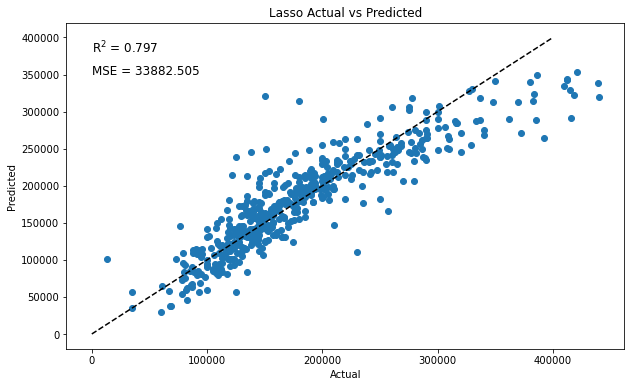

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(y_test, y_pred, 'o')
plt.plot([0, 400000], [0, 400000], 'k--')
plt.xlabel('Actual')
plt.ylabel('Predicted')

scorestr = r'R$^2$ = %.3f' % lr.score(X_test, y_test)
errstr = 'MSE = %.3f' % (mean_squared_error(y_test, y_pred) ** 0.5)
plt.text(0, 380000, scorestr, fontsize=12)
plt.text(0, 350000, errstr, fontsize=12)
plt.title('Lasso Actual vs Predicted');
plt.savefig('../images/Lasso Actual vs Predicted.jpg');

In [24]:
coef_df ={train[high_corr_cols.drop('SalePrice')].columns[x] : lr.coef_[x] for x in range(len(lr.coef_))}
coef_df

{'Overall Qual': 0.0,
 'Year Built': 315.9033891270061,
 'Year Remod/Add': 529.5795926997465,
 'Mas Vnr Area': 33.88518576784358,
 'BsmtFin SF 1': 25.837526062852145,
 'Gr Liv Area': 28.952413475705676,
 'TotRms AbvGrd': -0.0,
 'Fireplaces': 0.0,
 'Garage Cars': 0.0,
 'Garage Area': 50.258846551413924,
 'Bathrooms': 0.0,
 'SF': 36.36530238870577}

-----------------------------

In [25]:
X = train[high_corr_cols.drop(['SalePrice'])].fillna(0)
y = train['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [26]:
pf = PolynomialFeatures(include_bias=False)
pf.fit(X_train)

PolynomialFeatures(include_bias=False)

In [27]:
X_train_pf = pf.transform(X_train)

In [28]:
X_test_pf = pf.transform(X_test)

In [29]:
lr = LinearRegression()
lr.fit(X_train_pf, y_train)

LinearRegression()

In [30]:
lr.score(X_train_pf, y_train), lr.score(X_test_pf, y_test)

(0.9116362241222243, 0.8845360099504317)

In [31]:
mean_squared_error(y_train, lr.predict(X_train_pf))

425514817.7762408

In [32]:
y_pred = lr.predict(X_test_pf)

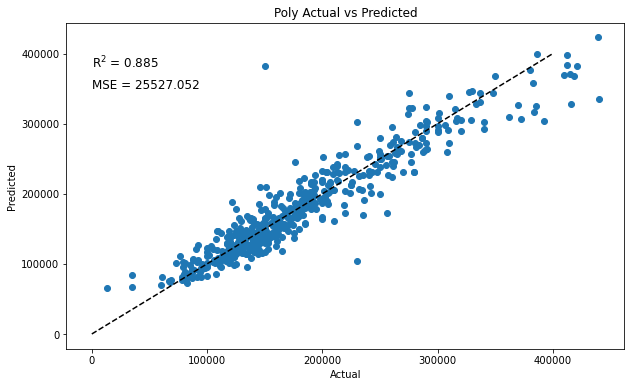

In [33]:
plt.figure(figsize=(10, 6))
plt.plot(y_test, y_pred, 'o')
plt.plot([0, 400000], [0, 400000], 'k--')
plt.xlabel('Actual')
plt.ylabel('Predicted')

scorestr = r'R$^2$ = %.3f' % lr.score(X_test_pf, y_test)
errstr = 'MSE = %.3f' % (mean_squared_error(y_test, y_pred) ** 0.5)
plt.text(0, 380000, scorestr, fontsize=12)
plt.text(0, 350000, errstr, fontsize=12)
plt.title('Poly Actual vs Predicted');
plt.savefig('../images/Poly Actual vs Predicted.jpg');

In [34]:
high_corr_cols

Index(['Overall Qual', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'BsmtFin SF 1', 'Gr Liv Area', 'TotRms AbvGrd', 'Fireplaces',
       'Garage Cars', 'Garage Area', 'SalePrice', 'Bathrooms', 'SF'],
      dtype='object')

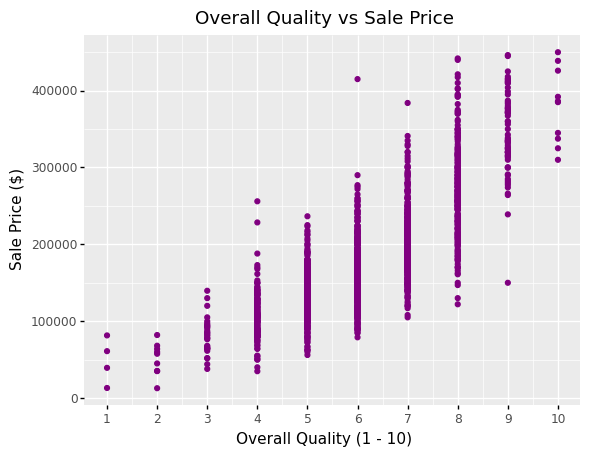

<ggplot: (80227362184)>

In [35]:
overall_qual = (
    p9.ggplot(data=train, mapping=p9.aes(x='Overall Qual', y='SalePrice'))
    + p9.xlab("Overall Quality (1 - 10)")
    + p9.ylab("Sale Price ($)")
    + p9.scale_x_continuous(breaks=np.arange(0, 11, 1))
    + p9.scale_y_continuous(breaks=np.arange(0, 700_000, 100_000))
    + p9.ggtitle("Overall Quality vs Sale Price")
    + p9.geom_point(color='purple')
)
overall_qual

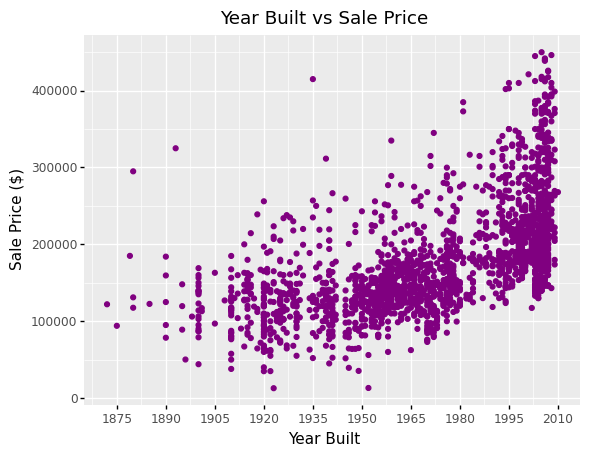

<ggplot: (80227336891)>

In [36]:
year_built = (
    p9.ggplot(data=train, mapping=p9.aes(x='Year Built', y='SalePrice'))
    + p9.xlab("Year Built")
    + p9.ylab("Sale Price ($)")
    + p9.scale_x_continuous(breaks=np.arange(1800, 2060, 15))
    + p9.scale_y_continuous(breaks=np.arange(0, 700_000, 100_000))
    
    + p9.ggtitle("Year Built vs Sale Price")
    + p9.geom_point(color='purple')
)
year_built

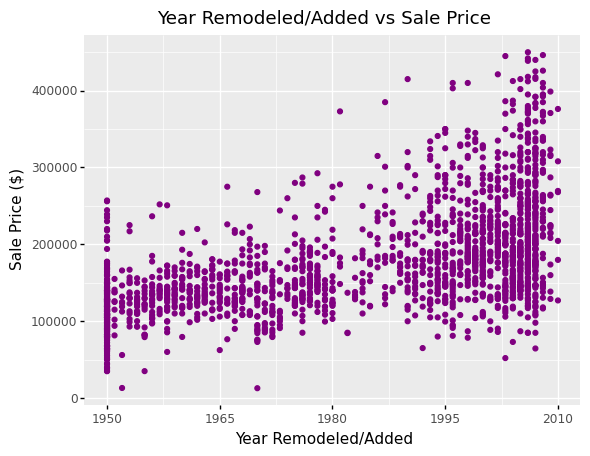

<ggplot: (80227420350)>

In [37]:
year_rem = (
    p9.ggplot(data=train, mapping=p9.aes(x='Year Remod/Add', y='SalePrice'))
    + p9.xlab("Year Remodeled/Added")
    + p9.ylab("Sale Price ($)")
    + p9.scale_x_continuous(breaks=np.arange(1950, 2060, 15))
    + p9.scale_y_continuous(breaks=np.arange(0, 700_000, 100_000))
    
    + p9.ggtitle("Year Remodeled/Added vs Sale Price")
    + p9.geom_point(color='purple')
)
year_rem

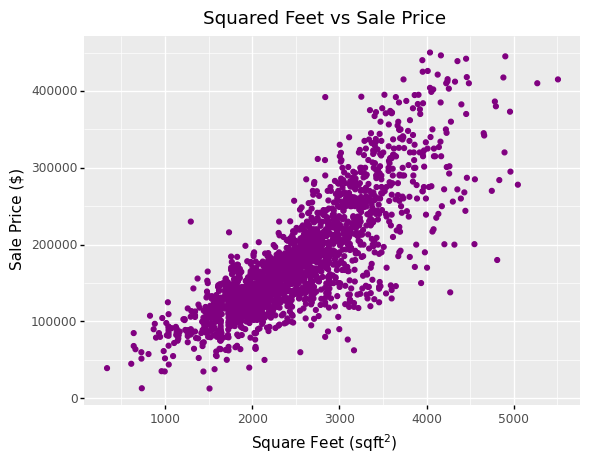

<ggplot: (80227415941)>

In [38]:
sf = (
    p9.ggplot(data=train, mapping=p9.aes(x='SF', y='SalePrice'))
    + p9.xlab("Square Feet (sqft$^2$)")
    + p9.ylab("Sale Price ($)")
    + p9.scale_y_continuous(breaks=np.arange(0, 700_000, 100_000))
    
    + p9.ggtitle("Squared Feet vs Sale Price")
    + p9.geom_point(color='purple')
)
sf

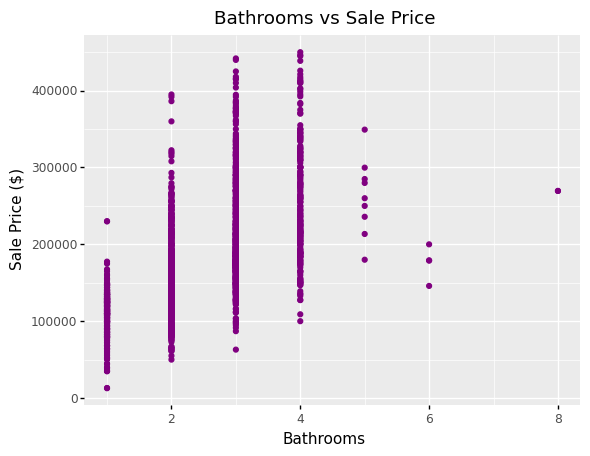

<ggplot: (80228637191)>

In [39]:
bathrooms = (
    p9.ggplot(data=train, mapping=p9.aes(x='Bathrooms', y='SalePrice'))
    + p9.xlab("Bathrooms")
    + p9.ylab("Sale Price ($)")
    + p9.scale_y_continuous(breaks=np.arange(0, 700_000, 100_000))
    
    + p9.ggtitle("Bathrooms vs Sale Price")
    + p9.geom_point(color='purple')
)
bathrooms